Matrix Completion

We intend to complete the Matrix with unkown entries using Matrix decomposotion where we learn decomposed matrices using Gradient Decent and Nested Linear Regression

Matrix Factorization

For a matrix $A_{n,m}$ learn $W_{n,r}$ and $H_{r,m}$ such that,

$ A = WH$

Method 1 Gradient Decent

In [10]:
import numpy as  np
import matplotlib.pyplot as plt

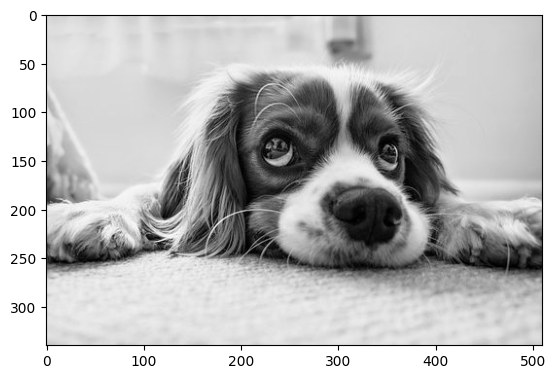

In [11]:
# Creating A
from matplotlib.image import imread

X = imread("Datasets/puppy.jpg")
A = np.mean(X,-1)
img = plt.imshow(A)
plt.set_cmap('gray')
plt.show()

In [12]:
# intializing W and H
r = 100
n = A.shape[0]
m = A.shape[1]
W = np.random.rand(n,r)
H = np.random.rand(r,m)

In [14]:
def loss_(W, H):
    return 2*(A - W@H)